Import Libraries:

In [1]:
%matplotlib inline
from sklearn.model_selection import train_test_split
import numpy as np
import qutip as qt
from vae import * 

2023-03-20 13:34:32.762758: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 13:34:32.901650: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-20 13:34:32.920616: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-20 13:34:32.920627: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
batch_size = 64
learning_rate = 0.0001
lat_dim = 2
hidden_act = "tanh"
final_act = "linear"

Noiseless  
0 Beta 
0.75 Beta 
0 0.1 0.5 Decoherence factor 

Noisy 
0 Beta 
0.75 Beta 
0 0.1 0.5 Decoherence factor 

# Noiseless 0.0 Deco 0.00 Beta

790/790 [==============================] - 1s 591us/step


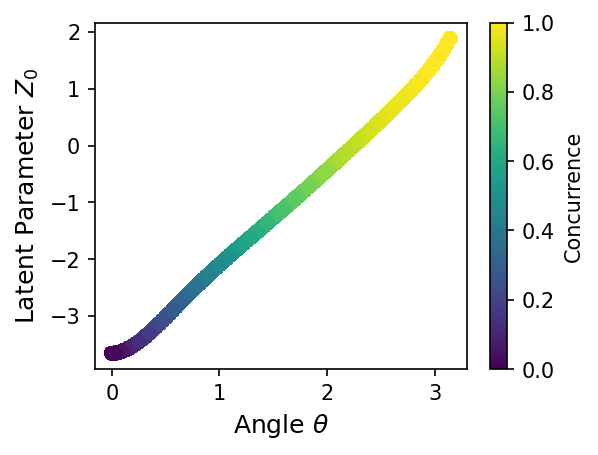

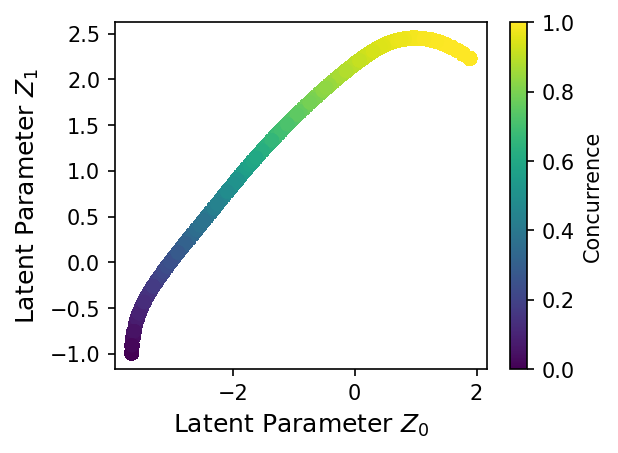

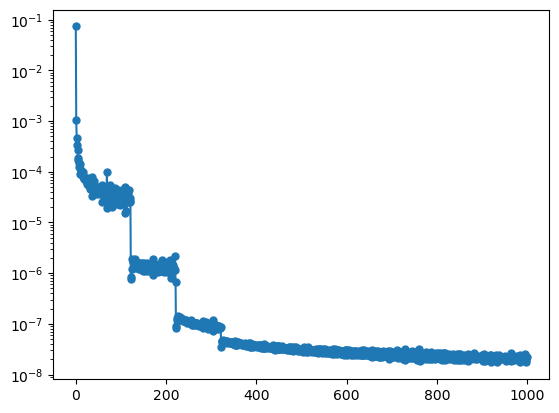

In [119]:
n_angle = 101
n_samples = 1000
beta = 0.0
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_00.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco00_lat2_beta00_no.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco00_lat2_beta00_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
temp_hist = vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco00_lat2_beta00_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.1 Deco 0.00 Beta

790/790 [==============================] - 1s 620us/step


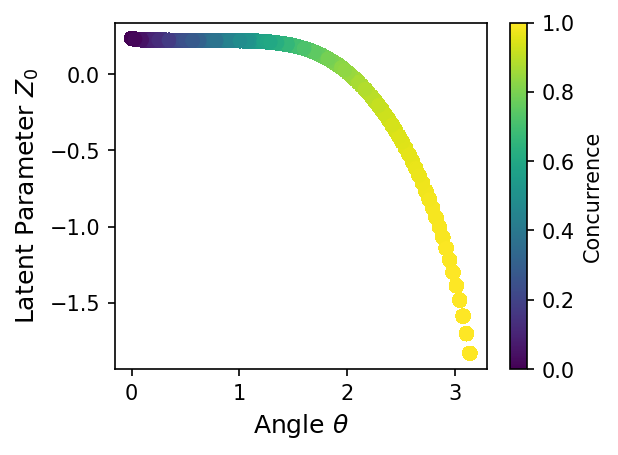

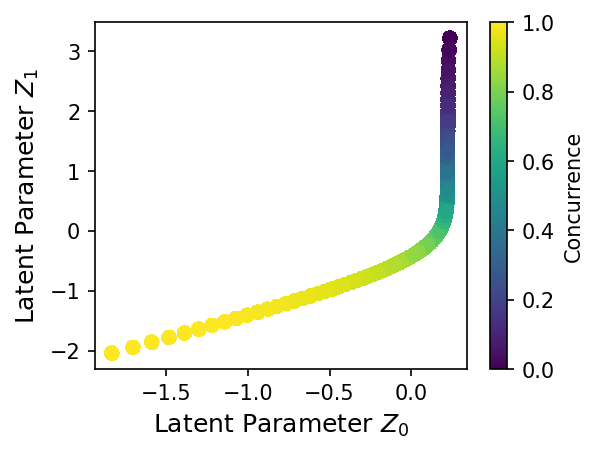

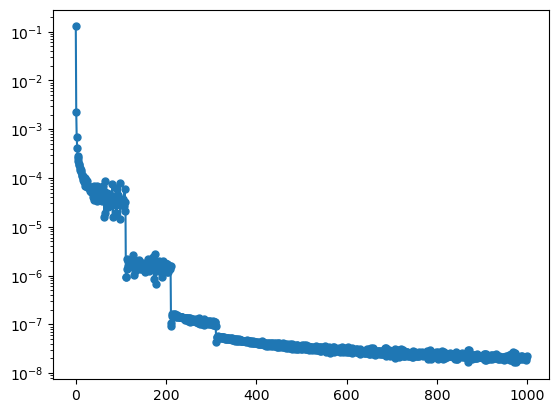

In [120]:
n_angle = 101
n_samples = 1000
beta = 0.00
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_01.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco01_lat2_beta00_no.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco01_lat2_beta00_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco01_lat2_beta00_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.5 Deco 0.00 Beta

790/790 [==============================] - 1s 642us/step


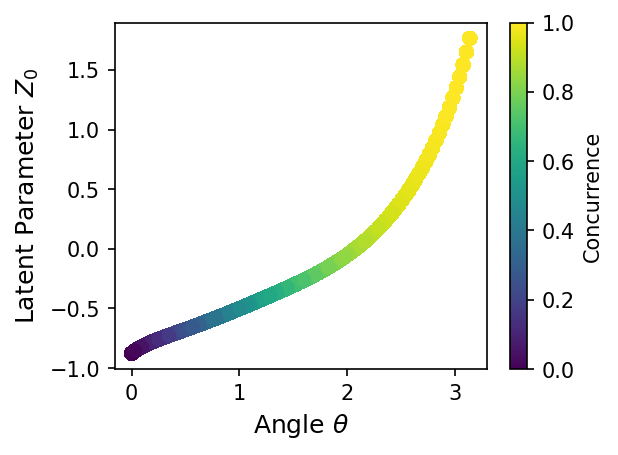

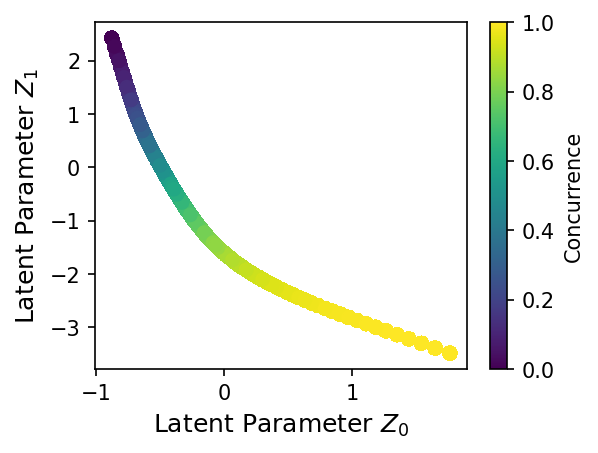

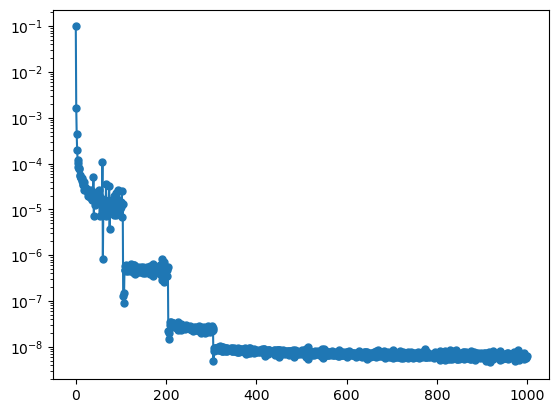

In [121]:
n_angle = 101
n_samples = 1000
beta = 0.00
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_05.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco05_lat2_beta00_no.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco05_lat2_beta00_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco05_lat2_beta00_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.0 Deco 0.75 Beta

790/790 [==============================] - 0s 517us/step


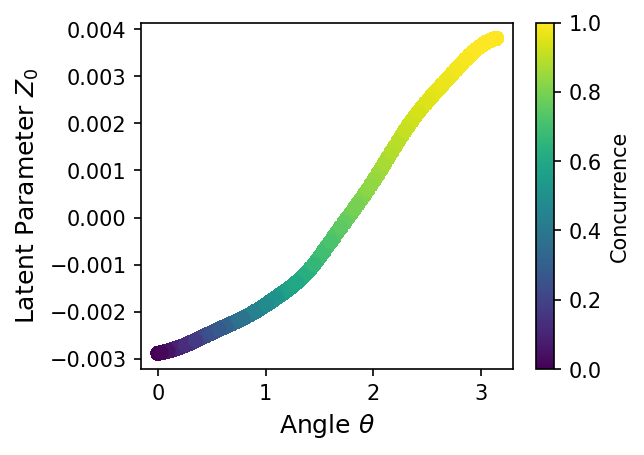

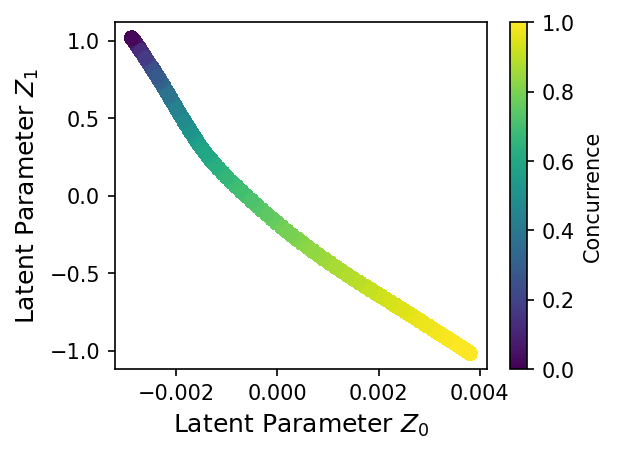

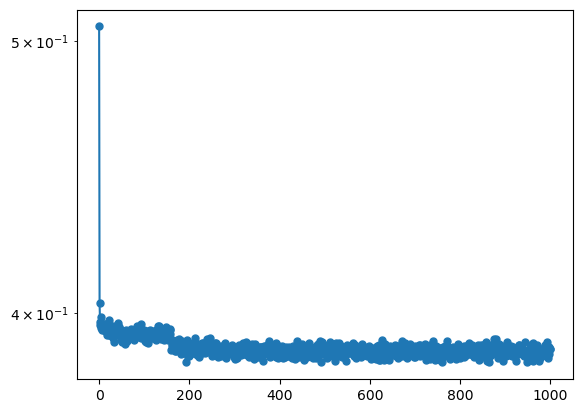

In [123]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_00.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco00_lat2_beta75_no.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco00_lat2_beta75_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco00_lat2_beta75_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.1 Deco 0.75 Beta

790/790 [==============================] - 1s 577us/step


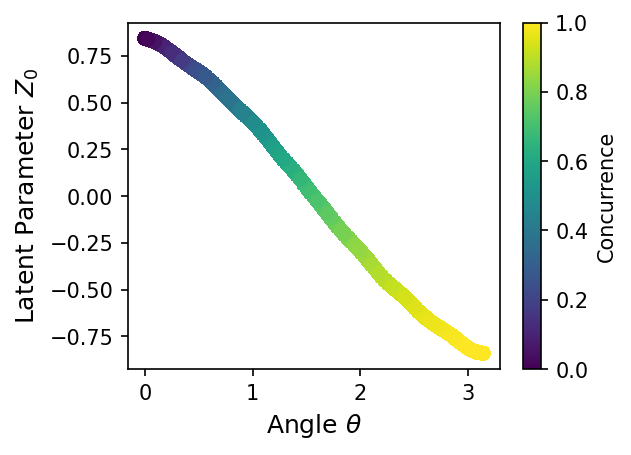

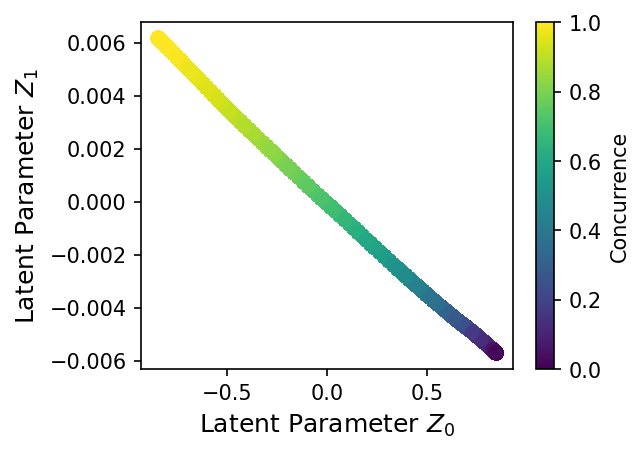

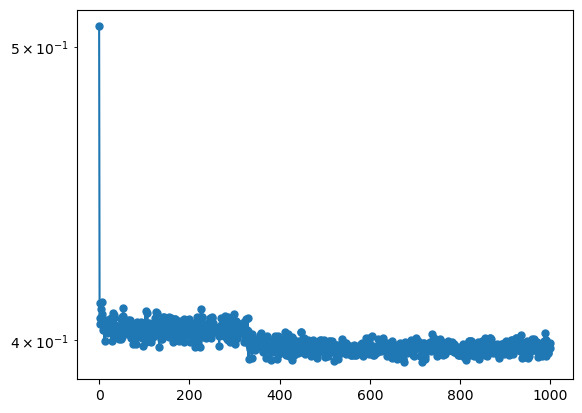

In [124]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_01.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco01_lat2_beta75_no.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco01_lat2_beta75_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco01_lat2_beta75_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noiseless 0.5 Deco 0.75 Beta

790/790 [==============================] - 0s 528us/step


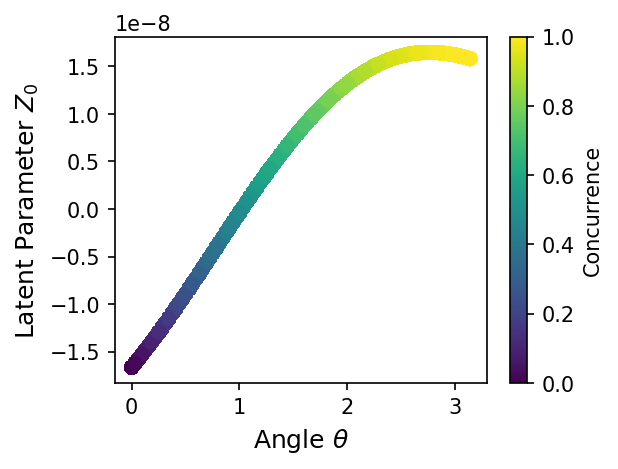

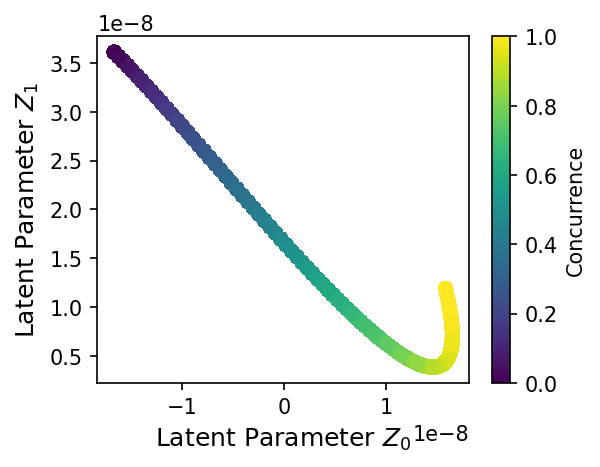

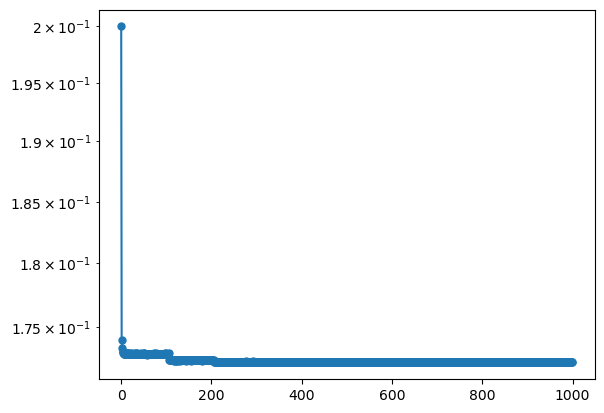

In [125]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_no_05.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)


concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco05_lat2_beta75_no.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco05_lat2_beta75_no.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco05_lat2_beta75_no.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.0 Deco 0.0 Beta

790/790 [==============================] - 0s 551us/step


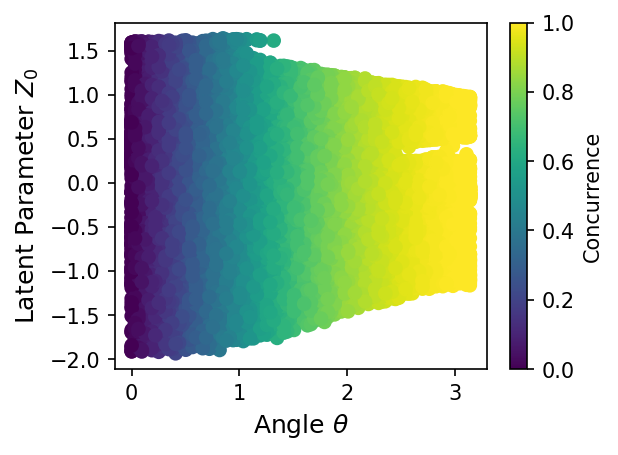

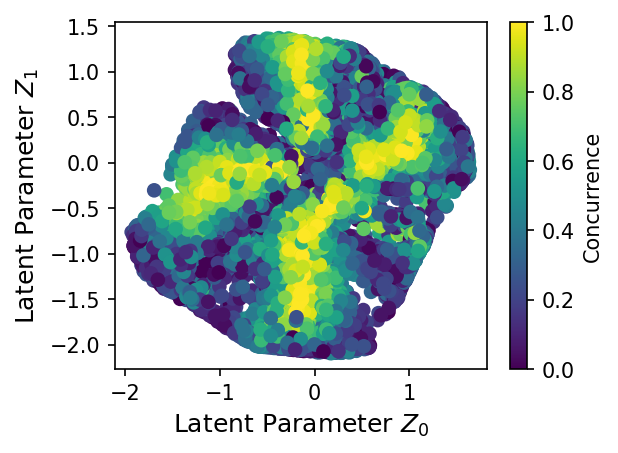

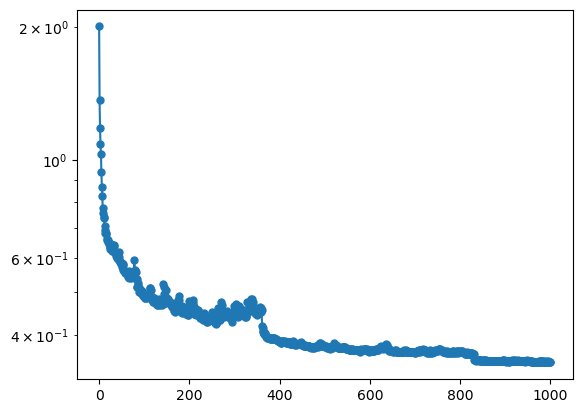

In [126]:
n_angle = 101
n_samples = 1000
beta = 0.00
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_00.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco00_lat2_beta00_noise.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco00_lat2_beta00_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco00_lat2_beta00_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.1 Deco 0.0 Beta

790/790 [==============================] - 0s 522us/step


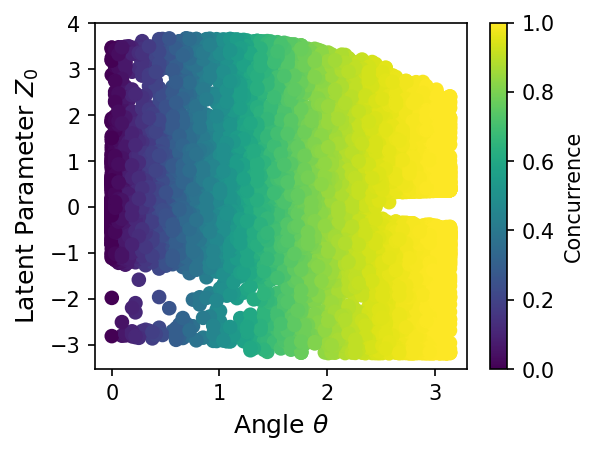

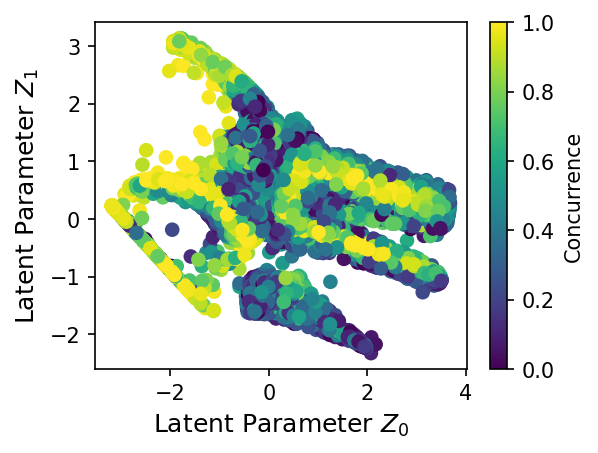

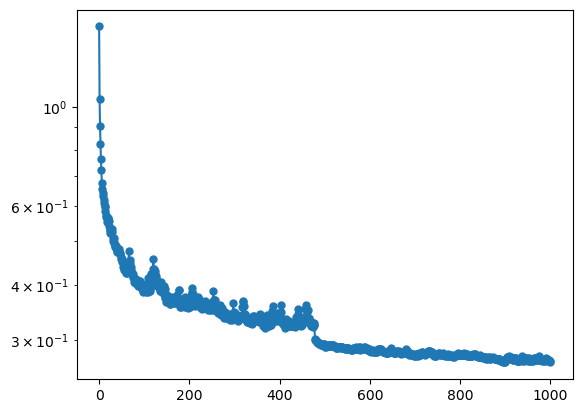

In [127]:
n_angle = 101
n_samples = 1000
beta = 0.00
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_01.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco01_lat2_beta00_noise.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco01_lat2_beta00_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco01_lat2_beta00_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.5 Deco 0.0 Beta

790/790 [==============================] - 0s 516us/step


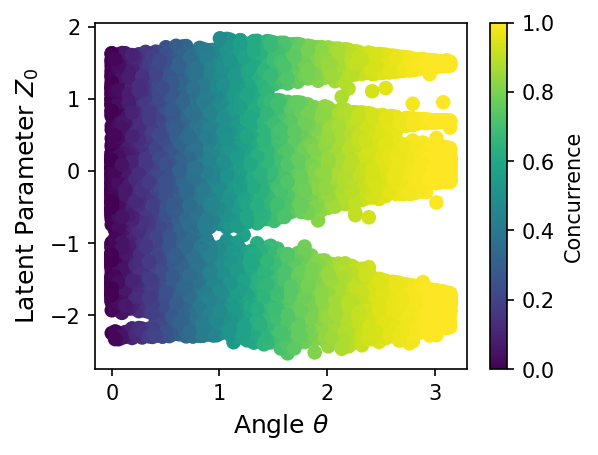

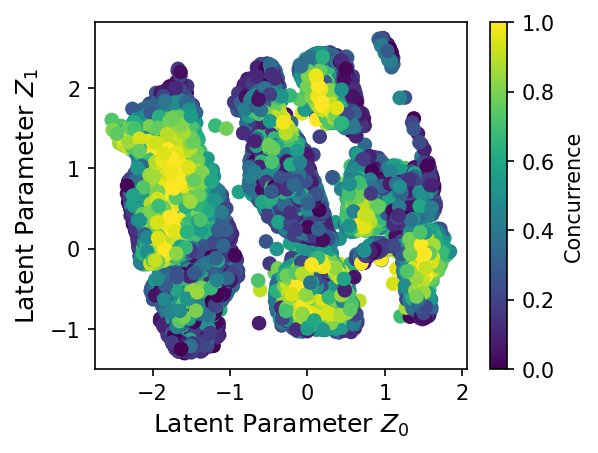

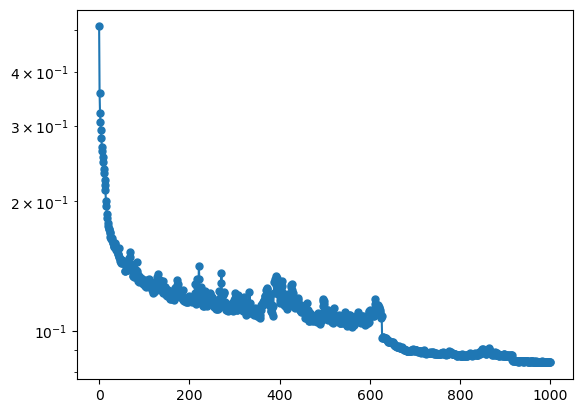

In [128]:
n_angle = 101
n_samples = 1000
beta = 0.00
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_05.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco05_lat2_beta00_noise.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco05_lat2_beta00_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco05_lat2_beta00_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.0 Deco 0.75 Beta

790/790 [==============================] - 0s 503us/step


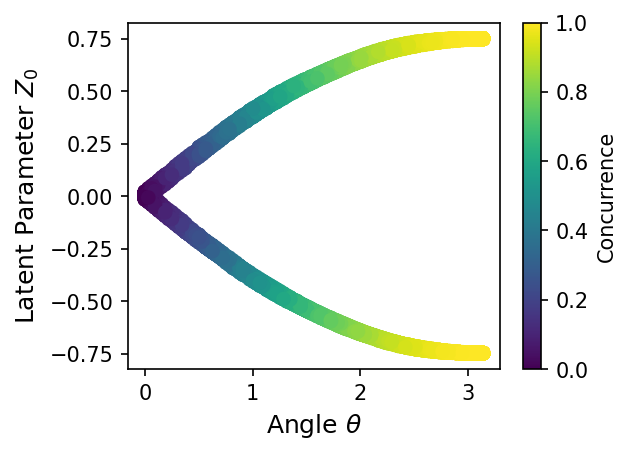

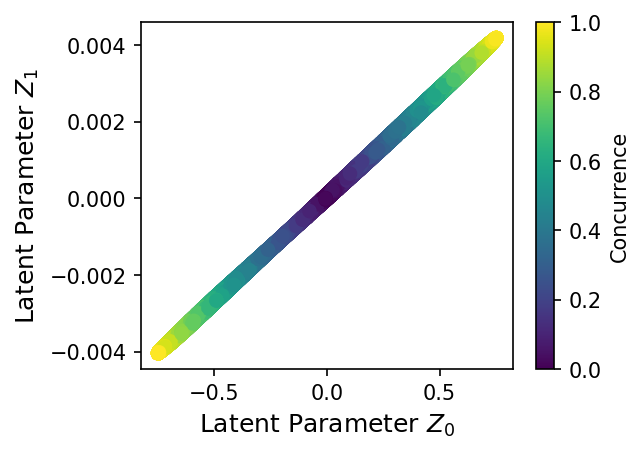

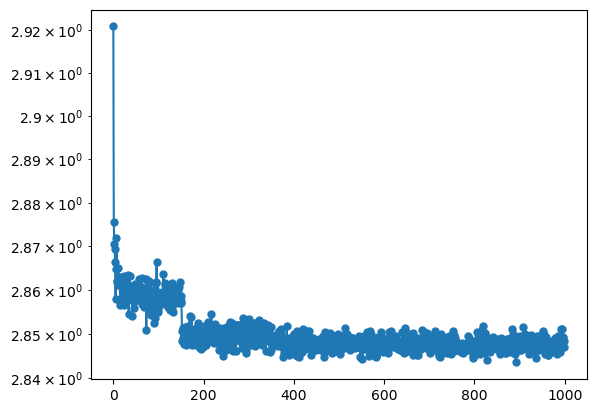

In [129]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_00.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco00_lat2_beta75_noise.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco00_lat2_beta75_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco00_lat2_beta75_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.1 Deco 0.75 Beta

790/790 [==============================] - 0s 521us/step


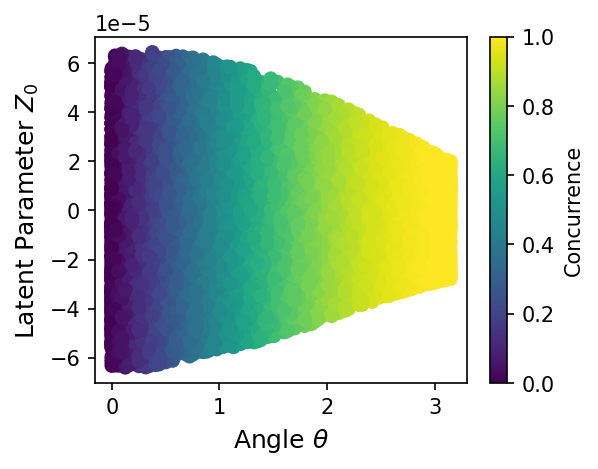

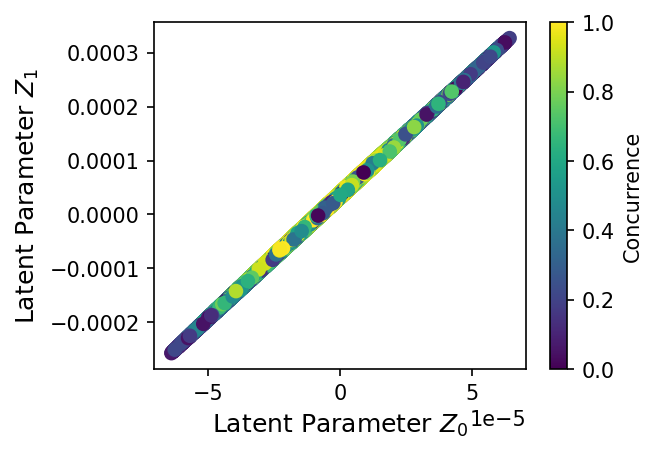

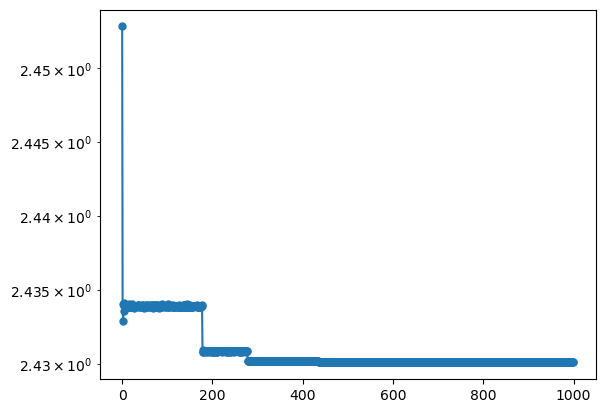

In [130]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_01.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco01_lat2_beta75_noise.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco01_lat2_beta75_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco01_lat2_beta75_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

# Noise 0.5 Deco 0.75 Beta

2023-03-17 14:14:25.995768: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-17 14:14:25.995784: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-17 14:14:25.995797: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (felix-Latitude-5521): /proc/driver/nvidia/version does not exist
2023-03-17 14:14:25.996177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


790/790 [==============================] - 1s 683us/step


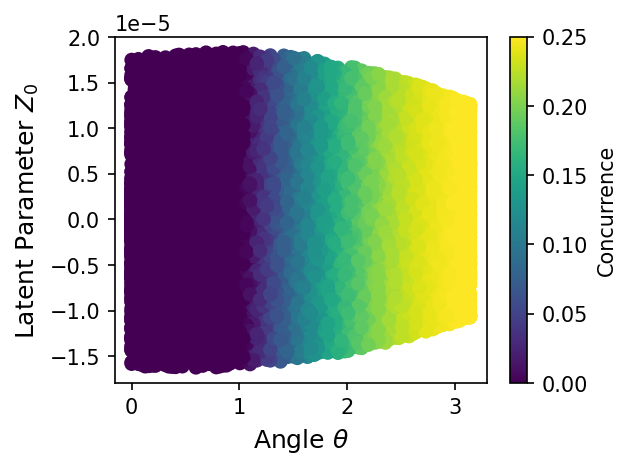

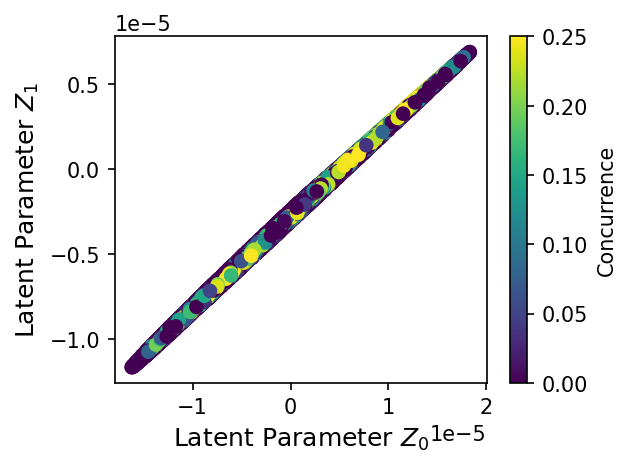

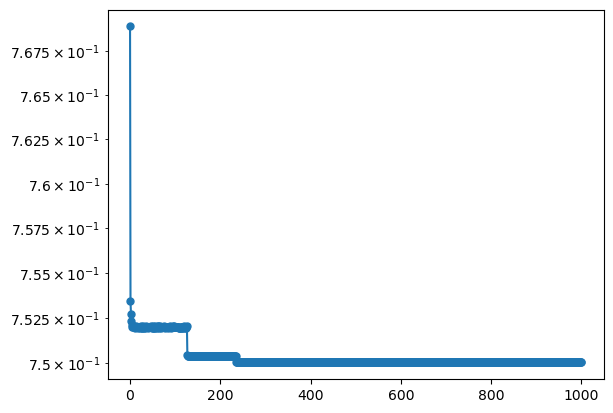

In [3]:
n_angle = 101
n_samples = 1000
beta = 0.75
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_05.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])

encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/deco/encoder_deco05_lat2_beta75_noise.h5")
decoder.load_weights("/home/felix/Downloads/deco/decoder_deco05_lat2_beta75_noise.h5")

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
vae.fit(X_test, epochs=1, batch_size=64, verbose=1) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)

plot_scatter(y_test,z_mean[:,0],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"Latent Parameter $Z_0$","Latent Parameter $Z_1$","Concurrence",1)

read_dictionary = np.load('/home/felix/Downloads/deco/history_deco05_lat2_beta75_noise.npy',allow_pickle='TRUE').item()
plt.plot(read_dictionary["reconstruction_loss"], marker='o', markersize="5")
plt.yscale("log")

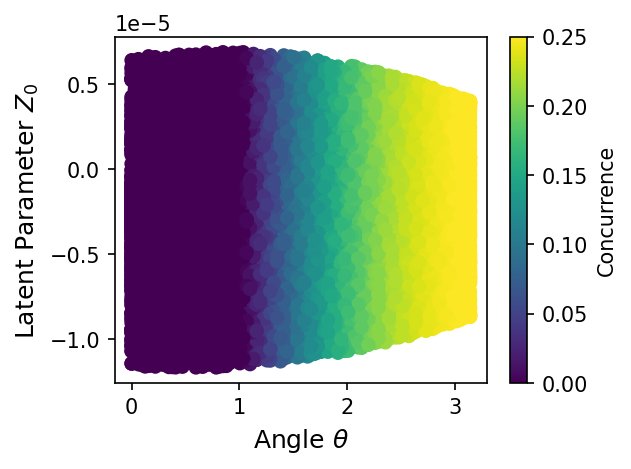

In [4]:
plot_scatter(y_test,z_mean[:,1],concurrence_arr,"Angle $\\theta$","Latent Parameter $Z_0$","Concurrence",1)

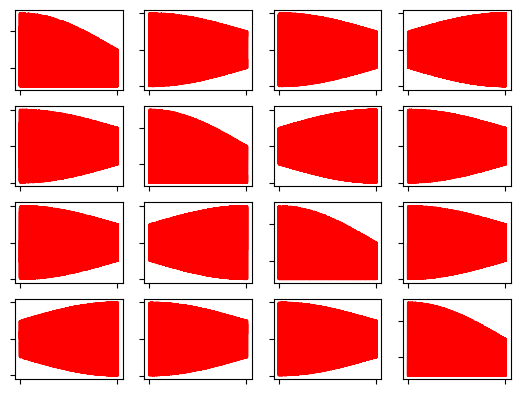

In [9]:
columns = 4
rows = 4
cnt = 0 
fig, ax_array = plt.subplots(rows, columns,squeeze=False)
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        axes.set_yticklabels([])
        axes.set_xticklabels([])
        axes.plot(np.array(rho_arr)[:,cnt],'r-')
        cnt += 1
plt.show()

# Beta Search 0.1

790/790 [==============================] - 0s 479us/step


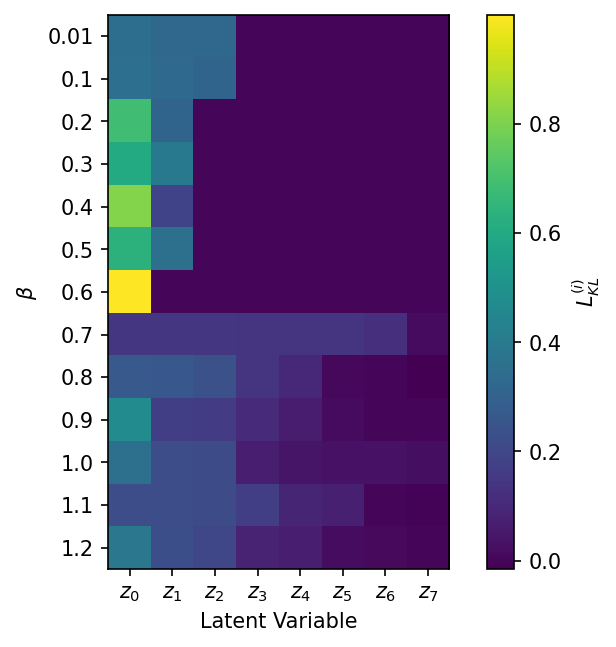

In [33]:
n_angle = 101
n_samples = 1000

batch_size = 64
learning_rate = 0.0001
hidden_act = "tanh"
final_act = "linear"

rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_01.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

def kl_loss(mu,sig):
    return -0.5 * (1 + sig - mu**2 - np.exp(sig))

inx_dict = {"001":0.01,"01":0.1,"02":0.2,"03":0.3,
            "04":0.4,"05":0.5,"06":0.6,"07":0.7,
            "08":0.8,"09":0.9,"10":1.0,"11":1.1, "12":1.2}
lat_dim = 8
recon_loss_arr = np.zeros(len(inx_dict))
kl_loss_arr = np.zeros(len(inx_dict))
full_kl_loss_arr = np.zeros((len(inx_dict),8))

cnt = 0
for inx,beta in inx_dict.items():

    encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

    encoder.load_weights("/home/felix/Downloads/dec/encoder_{}_deco_scan_01.h5".format(inx))
    decoder.load_weights("/home/felix/Downloads/dec/decoder_{}_deco_scan_01.h5".format(inx))

    vae = VAE(encoder, decoder, beta)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

    recon_loss_arr[cnt] = history_dict.history["reconstruction_loss"][0]
    kl_loss_arr[cnt] = history_dict.history["kl_loss"][0]
    
    
    z_mean, z_log_var, z = vae.encoder.predict(X_test)
    
    for i in range(8):
        full_kl_loss_arr[cnt][i] = np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))
    cnt += 1 
    
    
    
#     plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"$Z_0$","$Z_1$","",1)

beta_list = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]

row_sums = np.sort(full_kl_loss_arr,axis=-1).sum(axis=1)
new_matrix = np.sort(full_kl_loss_arr,axis=-1) / row_sums[:, np.newaxis]

fig, ax = plt.subplots(dpi=150)
im = ax.imshow(np.flip(new_matrix,axis=1))
cbar = fig.colorbar(im)
cbar.set_label("$L_{KL}^{(i)}$")
plt.xticks(range(8),["$z_{}$".format(i) for i in range(lat_dim)])
plt.yticks(range(len(inx_dict)),beta_list)

plt.xlabel("Latent Variable")
plt.ylabel("$\\beta$")

plt.show()

In [34]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/dec/encoder_{}_deco_scan_01.h5".format("06"))
decoder.load_weights("/home/felix/Downloads/dec/decoder_{}_deco_scan_01.h5".format("06"))

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)
for i in range(8):
        print(i,np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))) 

790/790 [==============================] - 0s 507us/step
0 5.4019512e-08
1 9.4467605e-06
2 2.559223e-07
3 2.5079983e-08
4 0.09948292
5 4.3573944e-08
6 9.763123e-08
7 3.3291025e-07


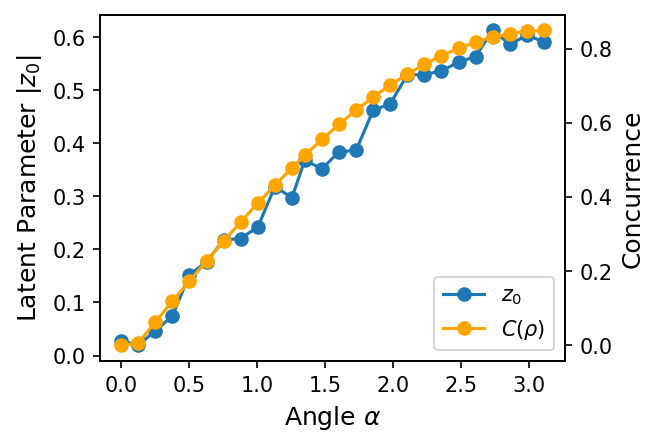

In [42]:
# concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

sort_inx = np.argsort(y_test)

ax.plot(y_test[sort_inx][::1000], np.abs(z_mean[sort_inx][:,4][::1000]),"-o", label="$z_0$") 

ax2 = ax.twinx()

ax2.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")

ax.set_ylabel("Latent Parameter $|z_0|$",fontsize=12)
ax.set_xlabel("Angle $\\alpha$",fontsize=12)
ax2.set_ylabel("Concurrence",fontsize=12)

fig.legend(bbox_to_anchor=(0.665, 0.32), loc=2)

# Beta Search 0.2

790/790 [==============================] - 0s 450us/step


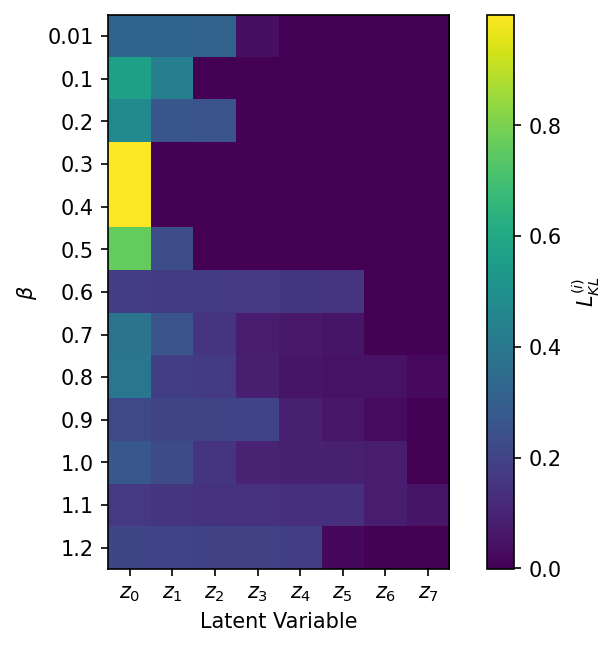

In [23]:
n_angle = 101
n_samples = 1000

batch_size = 64
learning_rate = 0.0001
hidden_act = "tanh"
final_act = "linear"

rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_02.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

def kl_loss(mu,sig):
    return -0.5 * (1 + sig - mu**2 - np.exp(sig))

inx_dict = {"001":0.01,"01":0.1,"02":0.2,"03":0.3,
            "04":0.4,"05":0.5,"06":0.6,"07":0.7,
            "08":0.8,"09":0.9,"10":1.0,"11":1.1, "12":1.2}
lat_dim = 8
recon_loss_arr = np.zeros(len(inx_dict))
kl_loss_arr = np.zeros(len(inx_dict))
full_kl_loss_arr = np.zeros((len(inx_dict),8))

cnt = 0
for inx,beta in inx_dict.items():

    encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

    encoder.load_weights("/home/felix/Downloads/dec/encoder_{}_deco_scan_02.h5".format(inx))
    decoder.load_weights("/home/felix/Downloads/dec/decoder_{}_deco_scan_02.h5".format(inx))

    vae = VAE(encoder, decoder, beta)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

    recon_loss_arr[cnt] = history_dict.history["reconstruction_loss"][0]
    kl_loss_arr[cnt] = history_dict.history["kl_loss"][0]
    
    
    z_mean, z_log_var, z = vae.encoder.predict(X_test)
    
    for i in range(8):
        full_kl_loss_arr[cnt][i] = np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))
    cnt += 1 
    
    
    
#     plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"$Z_0$","$Z_1$","",1)

beta_list = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]

row_sums = np.sort(full_kl_loss_arr,axis=-1).sum(axis=1)
new_matrix = np.sort(full_kl_loss_arr,axis=-1) / row_sums[:, np.newaxis]

fig, ax = plt.subplots(dpi=150)
im = ax.imshow(np.flip(new_matrix,axis=1))
cbar = fig.colorbar(im)
cbar.set_label("$L_{KL}^{(i)}$")
plt.xticks(range(8),["$z_{}$".format(i) for i in range(lat_dim)])
plt.yticks(range(len(inx_dict)),beta_list)

plt.xlabel("Latent Variable")
plt.ylabel("$\\beta$")

plt.show()

In [24]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/dec/encoder_{}_deco_scan_02.h5".format("03"))
decoder.load_weights("/home/felix/Downloads/dec/decoder_{}_deco_scan_02.h5".format("03"))

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)
for i in range(8):
        print(i,np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))) 

790/790 [==============================] - 0s 448us/step
0 5.397466e-09
1 2.067089e-07
2 1.6015732e-06
3 3.6402267e-07
4 6.255537e-11
5 0.26487812
6 4.3750518e-07
7 3.8743018e-08


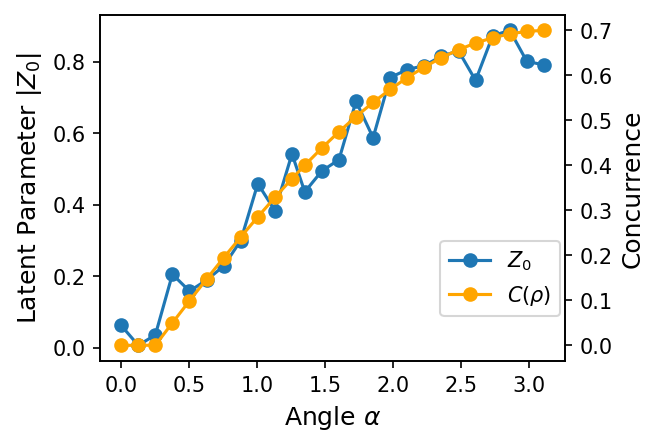

In [25]:
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

sort_inx = np.argsort(y_test)

ax.plot(y_test[sort_inx][::1000], np.abs(z_mean[sort_inx][:,5][::1000]),"-o", label="$Z_0$") 

ax2 = ax.twinx()

ax2.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")

ax.set_ylabel("Latent Parameter $|Z_0|$",fontsize=12)
ax.set_xlabel("Angle $\\alpha$",fontsize=12)
ax2.set_ylabel("Concurrence",fontsize=12)

fig.legend(bbox_to_anchor=(0.675, 0.4), loc=2)

# Beta Search 0.3

790/790 [==============================] - 0s 430us/step


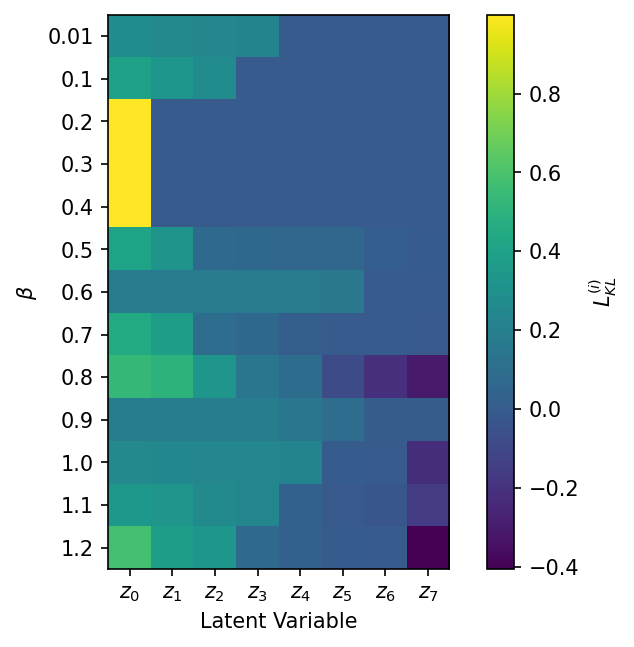

In [26]:
n_angle = 101
n_samples = 1000

batch_size = 64
learning_rate = 0.0001
hidden_act = "tanh"
final_act = "linear"

rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_03.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

def kl_loss(mu,sig):
    return -0.5 * (1 + sig - mu**2 - np.exp(sig))

inx_dict = {"001":0.01,"01":0.1,"02":0.2,"03":0.3,
            "04":0.4,"05":0.5,"06":0.6,"07":0.7,
            "08":0.8,"09":0.9,"10":1.0,"11":1.1, "12":1.2}
lat_dim = 8
recon_loss_arr = np.zeros(len(inx_dict))
kl_loss_arr = np.zeros(len(inx_dict))
full_kl_loss_arr = np.zeros((len(inx_dict),8))

cnt = 0
for inx,beta in inx_dict.items():

    encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

    encoder.load_weights("/home/felix/Downloads/dec/encoder_{}_deco_scan_03.h5".format(inx))
    decoder.load_weights("/home/felix/Downloads/dec/decoder_{}_deco_scan_03.h5".format(inx))

    vae = VAE(encoder, decoder, beta)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

    recon_loss_arr[cnt] = history_dict.history["reconstruction_loss"][0]
    kl_loss_arr[cnt] = history_dict.history["kl_loss"][0]
    
    
    z_mean, z_log_var, z = vae.encoder.predict(X_test)
    
    for i in range(8):
        full_kl_loss_arr[cnt][i] = np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))
    cnt += 1 
    
    
    
#     plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"$Z_0$","$Z_1$","",1)

beta_list = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]

row_sums = np.sort(full_kl_loss_arr,axis=-1).sum(axis=1)
new_matrix = np.sort(full_kl_loss_arr,axis=-1) / row_sums[:, np.newaxis]

fig, ax = plt.subplots(dpi=150)
im = ax.imshow(np.flip(new_matrix,axis=1))
cbar = fig.colorbar(im)
cbar.set_label("$L_{KL}^{(i)}$")
plt.xticks(range(8),["$z_{}$".format(i) for i in range(lat_dim)])
plt.yticks(range(len(inx_dict)),beta_list)

plt.xlabel("Latent Variable")
plt.ylabel("$\\beta$")

plt.show()

In [27]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/dec/encoder_{}_deco_scan_03.h5".format("04"))
decoder.load_weights("/home/felix/Downloads/dec/decoder_{}_deco_scan_03.h5".format("04"))

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)
for i in range(8):
        print(i,np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))) 

790/790 [==============================] - 0s 440us/step
0 3.1635313e-08
1 2.0926543e-09
2 1.752707e-07
3 3.2288014e-08
4 0.05612562
5 7.598624e-07
6 8.996194e-07
7 8.233113e-08


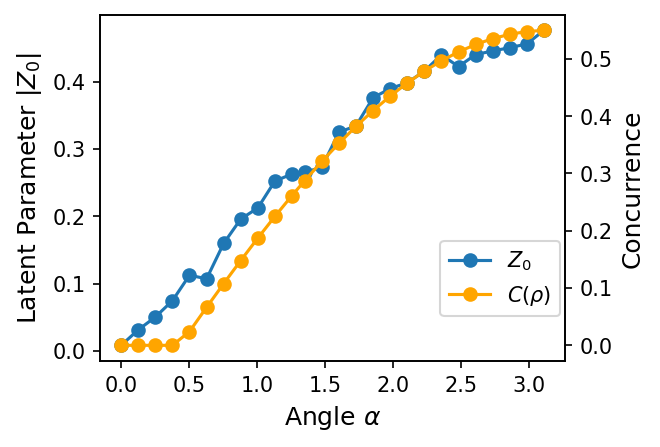

In [28]:
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

sort_inx = np.argsort(y_test)

ax.plot(y_test[sort_inx][::1000], np.abs(z_mean[sort_inx][:,4][::1000]),"-o", label="$Z_0$") 

ax2 = ax.twinx()

ax2.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")

ax.set_ylabel("Latent Parameter $|Z_0|$",fontsize=12)
ax.set_xlabel("Angle $\\alpha$",fontsize=12)
ax2.set_ylabel("Concurrence",fontsize=12)

fig.legend(bbox_to_anchor=(0.675, 0.4), loc=2)

# Beta Search 0.4

790/790 [==============================] - 0s 443us/step


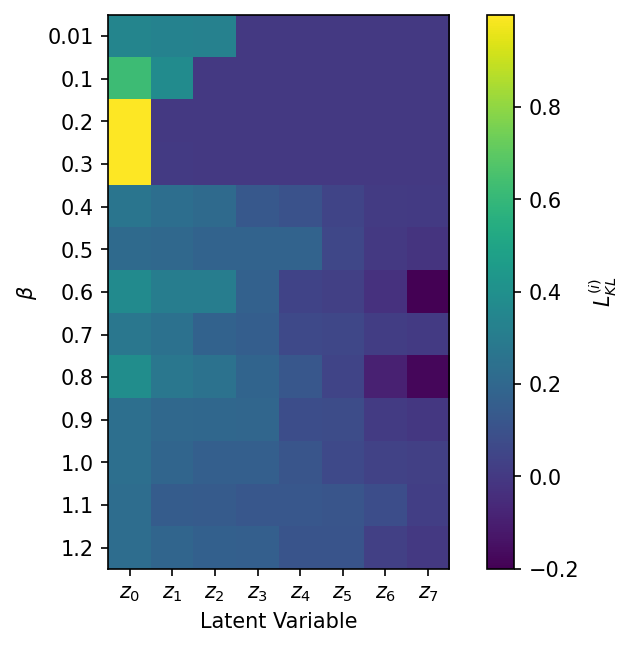

In [29]:
n_angle = 101
n_samples = 1000

batch_size = 64
learning_rate = 0.0001
hidden_act = "tanh"
final_act = "linear"

rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_04.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

def kl_loss(mu,sig):
    return -0.5 * (1 + sig - mu**2 - np.exp(sig))

inx_dict = {"001":0.01,"01":0.1,"02":0.2,"03":0.3,
            "04":0.4,"05":0.5,"06":0.6,"07":0.7,
            "08":0.8,"09":0.9,"10":1.0,"11":1.1, "12":1.2}
lat_dim = 8
recon_loss_arr = np.zeros(len(inx_dict))
kl_loss_arr = np.zeros(len(inx_dict))
full_kl_loss_arr = np.zeros((len(inx_dict),8))

cnt = 0
for inx,beta in inx_dict.items():

    encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

    encoder.load_weights("/home/felix/Downloads/dec/encoder_{}_deco_scan_04.h5".format(inx))
    decoder.load_weights("/home/felix/Downloads/dec/decoder_{}_deco_scan_04.h5".format(inx))

    vae = VAE(encoder, decoder, beta)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

    recon_loss_arr[cnt] = history_dict.history["reconstruction_loss"][0]
    kl_loss_arr[cnt] = history_dict.history["kl_loss"][0]
    
    
    z_mean, z_log_var, z = vae.encoder.predict(X_test)
    
    for i in range(8):
        full_kl_loss_arr[cnt][i] = np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))
    cnt += 1 
    
    
    
#     plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"$Z_0$","$Z_1$","",1)

beta_list = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]

row_sums = np.sort(full_kl_loss_arr,axis=-1).sum(axis=1)
new_matrix = np.sort(full_kl_loss_arr,axis=-1) / row_sums[:, np.newaxis]

fig, ax = plt.subplots(dpi=150)
im = ax.imshow(np.flip(new_matrix,axis=1))
cbar = fig.colorbar(im)
cbar.set_label("$L_{KL}^{(i)}$")
plt.xticks(range(8),["$z_{}$".format(i) for i in range(lat_dim)])
plt.yticks(range(len(inx_dict)),beta_list)

plt.xlabel("Latent Variable")
plt.ylabel("$\\beta$")

plt.show()

In [30]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

encoder.load_weights("/home/felix/Downloads/dec/encoder_{}_deco_scan_04.h5".format("02"))
decoder.load_weights("/home/felix/Downloads/dec/decoder_{}_deco_scan_04.h5".format("02"))

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)
for i in range(8):
        print(i,np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))) 

790/790 [==============================] - 0s 451us/step
0 2.7195534e-07
1 5.8100955e-08
2 7.695019e-08
3 4.832107e-09
4 4.5159076e-08
5 2.6131621e-09
6 1.6790805e-08
7 0.19181281


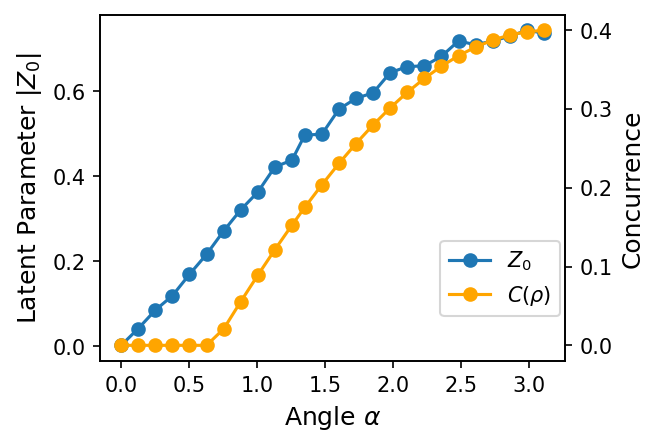

In [31]:
concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

sort_inx = np.argsort(y_test)

ax.plot(y_test[sort_inx][::1000], np.abs(z_mean[sort_inx][:,-1][::1000]),"-o", label="$Z_0$") 

ax2 = ax.twinx()

ax2.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")

ax.set_ylabel("Latent Parameter $|Z_0|$",fontsize=12)
ax.set_xlabel("Angle $\\alpha$",fontsize=12)
ax2.set_ylabel("Concurrence",fontsize=12)

fig.legend(bbox_to_anchor=(0.675, 0.4), loc=2)

# Beta search 0.5

790/790 [==============================] - 1s 658us/step


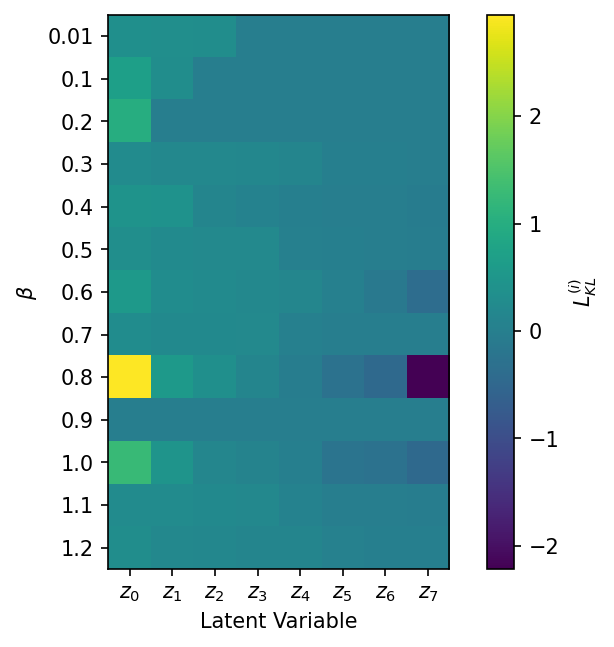

In [59]:
n_angle = 101
n_samples = 1000
rho_arr = np.load('/home/felix/Downloads/unitary_4x4_101_1000_deco_noise_05.npy', mmap_mode="r")
scan_arr = np.linspace(0, np.pi, n_angle)

alpha_arr = np.zeros(len(rho_arr))
cnt = 0
for theta in scan_arr:
        for _ in (range(n_samples)):
            alpha_arr[cnt] = theta
            cnt += 1


X_train, X_test, y_train, y_test = train_test_split(rho_arr, alpha_arr, random_state=42)

def kl_loss(mu,sig):
    return -0.5 * (1 + sig - mu**2 - np.exp(sig))

inx_dict = {"001":0.01,"01":0.1,"02":0.2,"03":0.3,
            "04":0.4,"05":0.5,"06":0.6,"07":0.7,
            "08":0.8,"09":0.9,"10":1.0,"11":1.1, "12":1.2}
lat_dim = 8
recon_loss_arr = np.zeros(len(inx_dict))
kl_loss_arr = np.zeros(len(inx_dict))
full_kl_loss_arr = np.zeros((len(inx_dict),8))

cnt = 0
for inx,beta in inx_dict.items():

    encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)

    encoder.load_weights("/home/felix/Downloads/dec/encoder_{}_deco_scan_05.h5".format(inx))
    decoder.load_weights("/home/felix/Downloads/dec/decoder_{}_deco_scan_05.h5".format(inx))

    vae = VAE(encoder, decoder, beta)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

    recon_loss_arr[cnt] = history_dict.history["reconstruction_loss"][0]
    kl_loss_arr[cnt] = history_dict.history["kl_loss"][0]
    
    
    z_mean, z_log_var, z = vae.encoder.predict(X_test)
    
    for i in range(8):
        full_kl_loss_arr[cnt][i] = np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))
    cnt += 1 
    
    
    
#     plot_scatter(z_mean[:,0],z_mean[:,1],concurrence_arr,"$Z_0$","$Z_1$","",1)

beta_list = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]

row_sums = np.sort(full_kl_loss_arr,axis=-1).sum(axis=1)
new_matrix = np.sort(full_kl_loss_arr,axis=-1) / row_sums[:, np.newaxis]

new_matrix[9]=[0,0,0,0,0,0,0,0]

fig, ax = plt.subplots(dpi=150)
im = ax.imshow(np.flip(new_matrix,axis=1))
cbar = fig.colorbar(im)
cbar.set_label("$L_{KL}^{(i)}$")
plt.xticks(range(8),["$z_{}$".format(i) for i in range(lat_dim)])
plt.yticks(range(len(inx_dict)),beta_list)

plt.xlabel("Latent Variable")
plt.ylabel("$\\beta$")

plt.show()

In [53]:
row_sums = np.sort(full_kl_loss_arr,axis=-1).sum(axis=1)
new_matrix = np.sort(full_kl_loss_arr,axis=-1) / row_sums[:, np.newaxis]



fig, ax = plt.subplots(dpi=150)
im = ax.imshow(np.flip(new_matrix,axis=1))
cbar = fig.colorbar(im)
cbar.set_label("$L_{KL}^{(i)}$")
plt.xticks(range(8),["$z_{}$".format(i) for i in range(lat_dim)])
plt.yticks(range(len(inx_dict)),beta_list)

plt.xlabel("Latent Variable")
plt.ylabel("$\\beta$")

plt.show()

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  2.444,  2.292,  2.628],
       [ 0.   ,  0.615,  0.   ,  1.374,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.135],
       [ 0.   ,  0.   , -0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   ],
       [-0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ],
       [ 0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [-0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   ],
       [-0.   , -0.   ,  0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   , -0.   ]])

In [58]:
np.round(row_sums,4)

array([ 7.363 ,  1.9894,  0.1351,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    , -0.    ,  0.    ,  0.    ,  0.    ])

In [55]:
encoder, decoder = vae_mlp_4x4(lat_dim, hidden_act, final_act)
beta = 0.2
encoder.load_weights("/home/felix/Downloads/dec/encoder_{}_deco_scan_05.h5".format("02"))
decoder.load_weights("/home/felix/Downloads/dec/decoder_{}_deco_scan_05.h5".format("02"))

vae = VAE(encoder, decoder, beta)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
history_dict = vae.fit(X_test, epochs=1, batch_size=64, verbose=0) 

z_mean, z_log_var, z = vae.encoder.predict(X_test)
for i in range(8):
        print(i,np.average(kl_loss(z_mean[:,i], z_log_var[:,i]))) 

790/790 [==============================] - 1s 655us/step
0 2.2980514e-05
1 5.7170887e-08
2 7.5192e-06
3 1.8522928e-06
4 3.7050748e-05
5 9.912976e-06
6 9.489531e-08
7 0.1342432


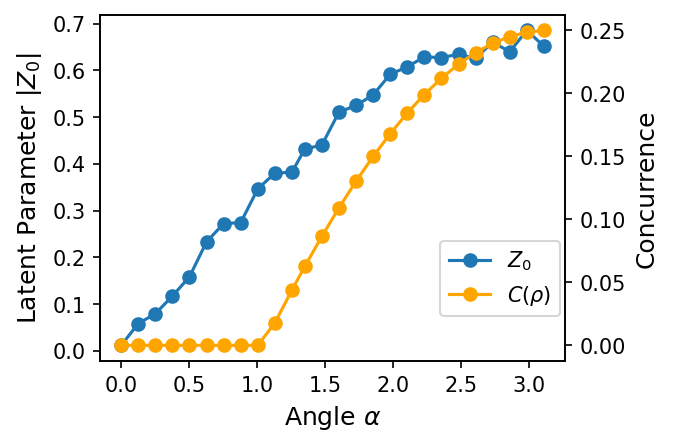

In [56]:
# plot_scatter(y_test, z_mean[:,4],concurrence_arr,"","","",1)

# concurrence_arr = np.array([qt.concurrence(qt.Qobj(dm.reshape(4,4),dims=[[2,2],[2,2]])) for dm in X_test])
fig, ax = plt.subplots(figsize=(4, 3),dpi=150)

sort_inx = np.argsort(y_test)

ax.plot(y_test[sort_inx][::1000], np.abs(z_mean[sort_inx][:,-1][::1000]),"-o", label="$Z_0$") 
# ax.plot(y_test[sort_inx][::1000], z_mean_noiseless[sort_inx][:,0][::1000],"-o", label=" $\\tilde{Z}_0$") 


ax2 = ax.twinx()

ax2.plot(y_test[sort_inx][::1000],concurrence_arr[sort_inx][::1000],"-o",c="orange", label= "$C(\\rho)$")

ax.set_ylabel("Latent Parameter $|Z_0|$",fontsize=12)
ax.set_xlabel("Angle $\\alpha$",fontsize=12)
ax2.set_ylabel("Concurrence",fontsize=12)

fig.legend(bbox_to_anchor=(0.675, 0.4), loc=2)